In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [66]:
picture_size = 56
folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/"

folder_path

'C:/Users/sarab/Desktop/Neural_N_CNN/non/images/'

# Exploratory Data Analysis (EDA)

In [37]:
import os
import cv2

def count_image_types(folder_path):
    # Initialize counters
    rgb_count = 0
    grayscale_count = 0

    # Loop through all folders and subfolders
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            # Get the full file path
            file_path = os.path.join(root, file_name)

            # Check if the file is an image
            if os.path.isfile(file_path) and any(file_name.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
                # Read the image
                img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

                # Check if the image is grayscale
                if len(img.shape) == 2:
                    grayscale_count += 1
                else:
                    rgb_count += 1

    return rgb_count, grayscale_count

# Specify the main folder path
main_folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/images"

# Check if main_folder_path exists and is a directory
if os.path.exists(main_folder_path) and os.path.isdir(main_folder_path):
    # Loop through each subfolder within the main folder
    for subfolder_name in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):
            # Count the number of RGB and grayscale images in the subfolder
            rgb_count, grayscale_count = count_image_types(subfolder_path)
            
            # Print the counts for the current subfolder
            print(f"Subfolder: {subfolder_name}")
            print("Number of RGB images:", rgb_count)
            print("Number of grayscale images:", grayscale_count)
            print()  # Add a blank line for readability
else:
    print(f"{main_folder_path} does not exist or is not a directory.")


Subfolder: train
Number of RGB images: 0
Number of grayscale images: 28821

Subfolder: validation
Number of RGB images: 0
Number of grayscale images: 7066



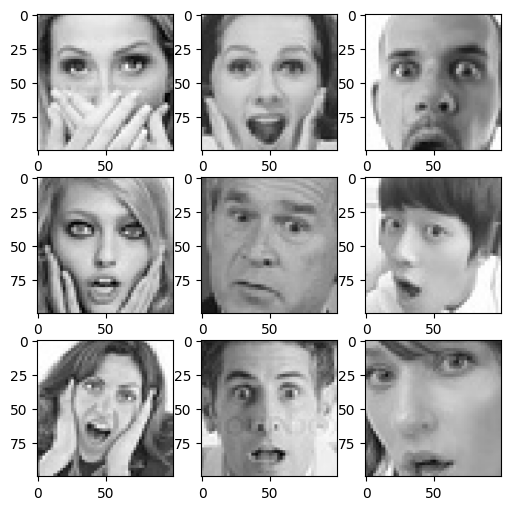

In [57]:
from keras.preprocessing.image import load_img
import os

folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/"

expression = 'surprise'
picture_size = 100  # You need to define the picture_size variable

plt.figure(figsize=(6, 6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + expression + "/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()


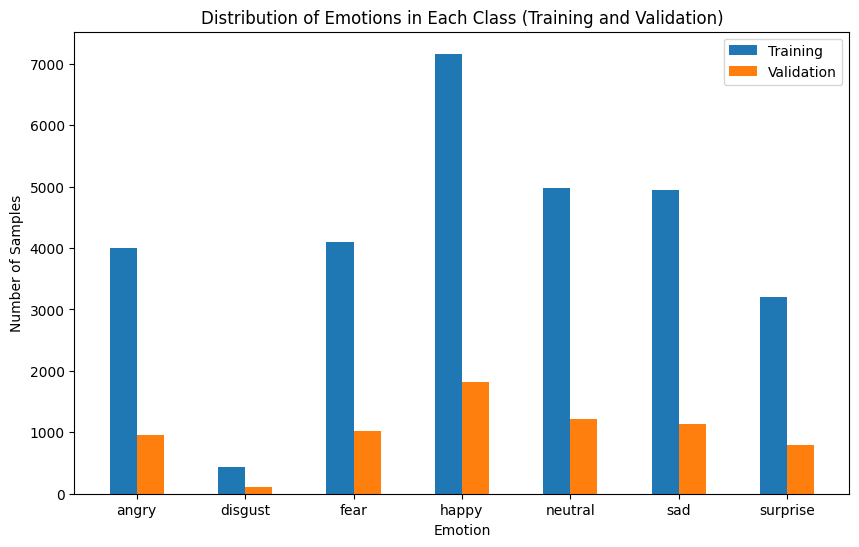

In [59]:
import matplotlib.pyplot as plt

emotions = list(train_class_counts.keys())

fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25

# Bar positions
train_positions = range(len(emotions))
validation_positions = [pos + bar_width for pos in train_positions]

# Plotting
ax.bar(train_positions, train_class_counts.values(), bar_width, label='Training')
ax.bar(validation_positions, validation_class_counts.values(), bar_width, label='Validation')

# Set labels and title
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Emotions in Each Class (Training and Validation)')
ax.set_xticks([pos + bar_width / 2 for pos in train_positions])
ax.set_xticklabels(emotions)
ax.legend()

# Show the plot
plt.show()


#Augmentation

In [67]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Set your folder path
folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/"

# Set picture size and batch size
picture_size = 56
batch_size = 128

# Create data generators
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1.0 / 255)



In [68]:
train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, "train"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, "validation"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Building model

In [64]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (56,56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

###double CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))



model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 56, 56, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2


### Compile model with checkpoint

In [69]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("f_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

# Fit model

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\sarab\AppData\Local\Temp\ipykernel_29840\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/50



225/225 [==============================] - ETA: 0s - loss: 1.9410 - accuracy: 0.2237WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 454s 2s/step - loss: 1.9410 - accuracy: 0.2237 - val_loss: 1.8548 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.7942 - accuracy: 0.2672WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 447s 2s/step - loss: 1.7942 - accuracy: 0.2672 - val_loss: 1.9822 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/50
 46/225 [=====>........................] - ETA: 8:01 - loss: 1.6680 - accuracy: 0.3342

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
model.save("best_model.h5")

In [79]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

# Load pre-trained model
emotion_dict = {0: 'Surprise',1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Angry'}

trained_model = load_model("best_model.h5") # Replace with the actual path

# Load face cascade
try:
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
except Exception as e:
    print(f"Error loading cascade classifiers: {e}")

# Evaluate the model on the test set
predictions = trained_model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_set.classes

# Initialize counts for correct and incorrect predictions for each emotion
correct_counts = {emotion: 0 for emotion in emotion_dict.values()}
incorrect_counts = {emotion: 0 for emotion in emotion_dict.values()}

# Count correct and incorrect predictions
for i in range(len(true_labels)):
    predicted_emotion = emotion_dict[predicted_labels[i]]
    true_emotion = emotion_dict[true_labels[i]]
    is_correct = predicted_emotion == true_emotion

    if is_correct:
        correct_counts[true_emotion] += 1
    else:
        incorrect_counts[true_emotion] += 1

# Calculate percentages
total_samples = len(true_labels)
percentages = {emotion: (correct_counts[emotion] / total_samples) * 100 for emotion in emotion_dict.values()}

# Print percentages
for emotion, percentage in percentages.items():
    print(f"Emotion: {emotion}, Percentage Correct: {percentage}%")


56/56 [==============================] - 36s 629ms/step
Emotion: Surprise, Percentage Correct: 7.302575714690065%
Emotion: Disgust, Percentage Correct: 0.8349844324936314%
Emotion: Fear, Percentage Correct: 4.924992923860741%
Emotion: Happy, Percentage Correct: 22.360600056609115%
Emotion: Neutral, Percentage Correct: 13.09085762807812%
Emotion: Sad, Percentage Correct: 8.802717237475234%
Emotion: Angry, Percentage Correct: 8.29323521086895%


In [88]:
##model_motion  with epoch 30 early stoping 9  accurcey 5.3
